In [10]:
from clique_benchmark import Trials
from graph_database import Graphs, Graph
import matplotlib.pyplot as plt
import numpy as np
graph_db = Graphs()
trial_db = Trials()

In [11]:
# run this cell to load the job results for all trials that are waiting pending job results
await trial_db.load_results()

In [ ]:
for grover_iterations in range(1, 6):
    print(f"Grover iterations: {grover_iterations}")
    for trial in trial_db.get(grover_iterations=grover_iterations):
        print(f"Trial {trial.trial_id} with graph: {trial.graph}")
        print(sorted(trial.counts.items(), key=lambda t: t[1], reverse=True))
        print(sorted(trial.simulation_counts.items(), key=lambda t: t[1], reverse=True))
        print(trial.success_rate)
        print(trial.simulation_success_rate)
        print(trial.expected_success_rate)
        print("")

Grover iterations: 1
Trial 1 with graph: 001
[('110', 278), ('100', 200), ('000', 146), ('010', 107), ('001', 93), ('111', 63), ('101', 62), ('011', 51)]
[('110', 778), ('111', 41), ('010', 36), ('101', 35), ('001', 32), ('000', 30), ('100', 24), ('011', 24)]
0.278
0.778
0.7812500000000001

Trial 3 with graph: 100
[('000', 247), ('100', 150), ('111', 130), ('110', 128), ('001', 114), ('011', 83), ('101', 76), ('010', 72)]
[('011', 781), ('100', 46), ('110', 37), ('001', 35), ('000', 29), ('111', 28), ('010', 23), ('101', 21)]
0.083
0.781
0.7812500000000001

Trial 5 with graph: 010
[('101', 295), ('001', 149), ('110', 121), ('010', 108), ('100', 96), ('011', 94), ('000', 82), ('111', 55)]
[('101', 776), ('000', 39), ('010', 38), ('100', 36), ('110', 35), ('011', 28), ('001', 24), ('111', 24)]
0.295
0.776
0.7812500000000001

Trial 7 with graph: 110
[('011', 243), ('101', 201), ('001', 175), ('111', 90), ('100', 83), ('010', 72), ('000', 71), ('110', 65)]
[('011', 514), ('101', 486)]
0.44

In [19]:
def get_probability_data(trial_db):
    n_data = []
    grover_iterations_data = []
    probability_data = []

    for n in range(2, 21):
        for grover_iterations in range(1, 6):
            print(f"(n, grover_iterations) = ({n}, {grover_iterations})")
            trials = trial_db.get(n=n, grover_iterations=grover_iterations)

            if len(trials) == 0:
                print(f"Warning: no results for {n} variables, complexity {grover_iterations}; skipping")
                continue

            success_rates = np.zeros(len(trials))
            expected_success_rates = np.zeros(len(trials))

            for i, trial in enumerate(trials):
                success_rates[i] = trial.success_rate
                expected_success_rates[i] = trial.expected_success_rate
            
            n_data.append(n)
            grover_iterations_data.append(grover_iterations)
            probability_data.append(np.mean(success_rates / expected_success_rates))
            print(f"Mean success rate over expected: {probability_data[-1]}")
    
    return n_data, grover_iterations_data, probability_data

def plot_probability_data(n_data, grover_iterations_data, probability_data, title, filepath=None):
    plt.figure(figsize=(20, 10))
    plt.scatter(n_data, grover_iterations_data, c=probability_data, cmap='RdYlGn', edgecolors='black', alpha=0.75, s=450)
    plt.xticks(np.arange(min(n_data), max(n_data) + 1, 1))
    plt.yticks(np.arange(min(grover_iterations_data), max(grover_iterations_data) + 1, 1))

    plt.xlabel('Verticies Count')
    plt.ylabel('Grover Iterations')
    plt.title(title)
    cbar = plt.colorbar()
    if filepath is not None:
        plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()

In [13]:
n_data, grover_iterations_data, probability_data = get_probability_data(trial_db)

(n, grover_iterations) = (2, 1)
(n, grover_iterations) = (2, 2)
(n, grover_iterations) = (2, 3)
(n, grover_iterations) = (2, 4)
(n, grover_iterations) = (2, 5)
(n, grover_iterations) = (3, 1)
Mean success rate over expected: 0.3849466666666667
(n, grover_iterations) = (3, 2)
Mean success rate over expected: 0.15444628099173555
(n, grover_iterations) = (3, 3)
(n, grover_iterations) = (3, 4)
(n, grover_iterations) = (3, 5)
(n, grover_iterations) = (4, 1)
Mean success rate over expected: 0.25758315502462137
(n, grover_iterations) = (4, 2)
Mean success rate over expected: 0.11660676033713586
(n, grover_iterations) = (4, 3)
Mean success rate over expected: 0.06917579086046254
(n, grover_iterations) = (4, 4)
(n, grover_iterations) = (4, 5)
(n, grover_iterations) = (5, 1)
Mean success rate over expected: 0.13321134570318022
(n, grover_iterations) = (5, 2)
Mean success rate over expected: 0.07066549254534787
(n, grover_iterations) = (5, 3)
Mean success rate over expected: 0.05653442373898247
(

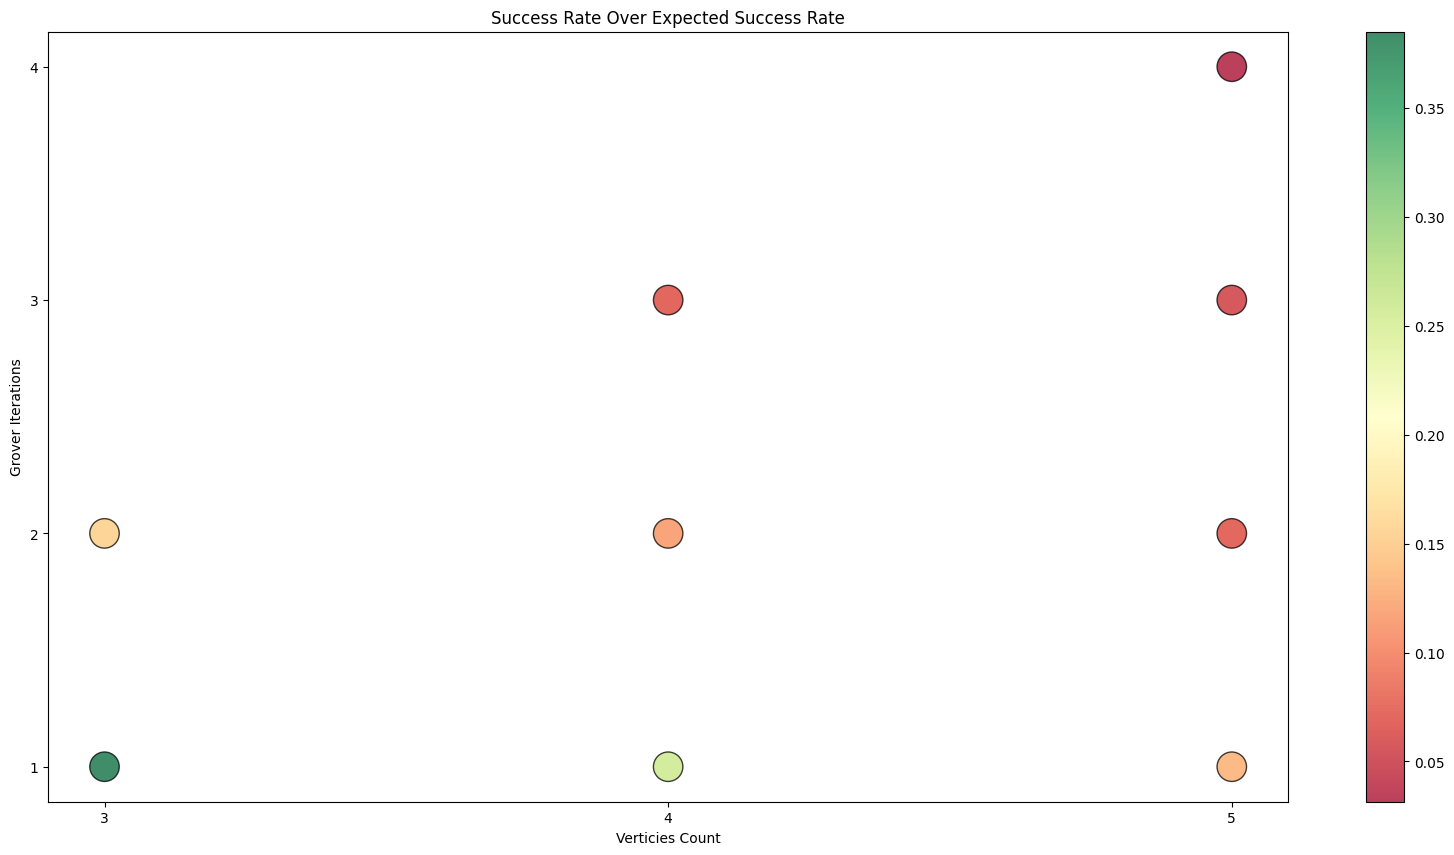

In [21]:
plot_probability_data(n_data, grover_iterations_data, probability_data, "Success Rate Over Expected Success Rate", filepath="mean_success_rate_over_expected.png")